# Data Analysis of UM Races Dataset


In [1]:
## Import Necessary Libraries

import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

C:\Users\Nima\AppData\Local\Temp\ipykernel_10692\2904443999.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


In [175]:
df.head()

,A,B
0,1,4
1,2,5
2,3,6


In [ ]:
df.shape

In [5]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

# Data Cleaning
Filter for Races in the USA that are 50k or 50mi, in 2020

In [ ]:
# Step 1: Filter for 50km and 50mi events
#no data as 50m,50k,50Mi
df[df["Event distance/length"] == '50mi']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [14]:
#select those rows other than 50mi an 50km
df[~df["Event distance/length"].isin(['50km','50mi'])] #faster

# df[(df["Event distance/length"] != '50km') & (df["Event distance/length"] != '50mi')]
# df.query("`Event distance/length` not in ['50km', '50mi']")

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
22,2018,06.01.2018,6 Stunden Self-Transcendence Sri Chinmoy Smole...,6h,9,60.375 km,Мкшч,RUS,1966.0,M,M50,10.063,22
23,2018,06.01.2018,6 Stunden Self-Transcendence Sri Chinmoy Smole...,6h,9,59.750 km,Лично,RUS,1990.0,M,M23,9.958,23
24,2018,06.01.2018,6 Stunden Self-Transcendence Sri Chinmoy Smole...,6h,9,56.250 km,Ахиллес,RUS,1995.0,M,MU23,9.375,24
25,2018,06.01.2018,6 Stunden Self-Transcendence Sri Chinmoy Smole...,6h,9,56.000 km,Аматар,RUS,1956.0,M,M60,9.333,25
26,2018,06.01.2018,6 Stunden Self-Transcendence Sri Chinmoy Smole...,6h,9,55.375 km,Endurance,RUS,NaN,M,NaN,9.229,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461190,1995,00.00.1995,La SainteLyon 65 km (FRA),65km,2,4:33:20 h,NaN,FRA,NaN,M,NaN,14268.0,1151060
7461191,1995,00.00.1995,La SainteLyon 65 km (FRA),65km,2,6:05:15 h,NaN,FRA,NaN,F,NaN,10678.0,1073520
7461192,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,241.000 km,*Budapest,HUN,1950.0,M,M40,10042.0,1047373
7461193,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,228.000 km,*Szeged,HUN,1959.0,M,M35,9500.0,380150


In [16]:
#select unique values in this column to see what are the categories
df['Event distance/length'].unique()
len(df['Event distance/length'].unique())  #2160 different type of marathons

2160

In [ ]:
# Combine 50km and 50mi events using `isin`
df[df["Event distance/length"].isin(['50km','50mi'])]

In [17]:
# Filter for events in 2020 and 50km or 50mi
df[(df["Event distance/length"].isin(['50km','50mi'])) & (df['Year of event'] == 2020)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


In [45]:
df['Event name'].head().str.split('(').str.get(1).str.split(')').str.get(0)
# df['Event name'].head().str.extract(r'\((.{3})\)')

0    CHI
1    CHI
2    CHI
3    CHI
4    CHI
Name: Event name, dtype: object

In [ ]:
# Filter for events in the USA
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']

In [46]:
# Combine all filters
df2 = df[(df["Event distance/length"].isin(['50km','50mi'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]

In [47]:
df2.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [48]:
df2.shape

(26090, 13)

In [56]:
#extract event name:
df2['Event name'].head().str.split('- ').str.get(0)


2539945    West Seattle Beach Run 
2539946    West Seattle Beach Run 
2539947    West Seattle Beach Run 
2539948    West Seattle Beach Run 
2539949    West Seattle Beach Run 
Name: Event name, dtype: object

## Clean Up Event Names

In [55]:
# Remove "(USA)" from event names
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)

# Display the cleaned data
df2.head()

C:\Users\Nima\AppData\Local\Temp\ipykernel_10692\1462170538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.split('(').str.get(0)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


## Calculate Athlete Age

In [58]:
# Calculate athlete age category
df2['Athlete age category'] = 2020 - df2['Athlete year of birth']

# Remove 'h' from Athlete performance
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

# Display the cleaned data
df2.head(5)

C:\Users\Nima\AppData\Local\Temp\ipykernel_10692\437837842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete age category'] = 2020 - df2['Athlete year of birth']
C:\Users\Nima\AppData\Local\Temp\ipykernel_10692\437837842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,29.0,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,39.0,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,21.0,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,37.0,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,43.0,11.212,810281


 ## Drop Unnecessary Columns

In [61]:
# Drop unnecessary columns
df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete year of birth'], axis=1)

# Display the cleaned data
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,29.0,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,39.0,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,21.0,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,37.0,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,43.0,11.212,810281


## Handle Missing Values*

In [68]:
# Check for null values
df2.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete age category         233
Athlete average speed          0
Athlete ID                     0
dtype: int64

In [71]:
# Filter rows with null values in the 'Athlete age category' column
df2[df2['Athlete age category'].isna()]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,NaN,8.097,811923
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,NaN,10.469,812656
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,NaN,9.721,812657
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,NaN,8.473,658221
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,NaN,8.17,812660
...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,F,NaN,5.866,857251
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,M,NaN,6.752,857957
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,NaN,8.885,859462
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,NaN,7.579,398583


In [74]:
# Drop rows with missing values
df2 = df2.dropna()

# Check the shape of the dataset after dropping nulls
df2.shape
df2

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,29.0,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,39.0,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,21.0,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,37.0,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,43.0,11.212,810281
...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,62.0,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,43.0,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,58.0,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,39.0,6.543,860349


## Check for Duplicated Values

In [73]:
# Check for duplicated values
df2[df2.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete age category,Athlete average speed,Athlete ID


## Reset Index and Fix Data Types

In [76]:
# Reset index
df2 = df2.reset_index(drop=True)

# Check data types of each column
df2.dtypes
df2

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,29.0,15.158,71287
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,39.0,12.369,629508
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,21.0,12.099,64838
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,37.0,11.449,704450
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,43.0,11.212,810281
...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,62.0,7.013,816361
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,43.0,6.706,326469
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,58.0,6.705,372174
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,39.0,6.543,860349


In [77]:
# Convert 'Athlete age category' to int
df2['Athlete age category'] = df2['Athlete age category'].astype(int)

# Convert 'Athlete average speed' to float
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

# Check updated data types
df2.dtypes

# Display the cleaned data
df2.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,29,15.158,71287
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,39,12.369,629508
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,21,12.099,64838
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,37,11.449,704450
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,43,11.212,810281


## Renaming Columns

In [85]:
# Rename columns for better readability
df2 = df2.rename(columns={'Year of event' : 'year',
                          'Event dates' : 'race_day',
                          'Event name' : 'race_name',
                          'Event distance/length' : 'race_length',
                          'finishers' : 'number of finishers',
                          'Athlete gender' : 'gender',
                          'Athlete age category' : 'age',
                          'Athlete average speed' : 'avr_speed',
                          'id' : 'winner id',
                          'Athlete performance': 'winner performance'
})

# Display the renamed columns
df2.head(5)

,year,race_day,race_name,race_length,number of finishers,winner performance,gender,age,avr_speed,winner id
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,29,15.158,71287
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,39,12.369,629508
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,21,12.099,64838
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,37,11.449,704450
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,43,11.212,810281


# Visualization and Analysis

## Distribution of Race Lengths

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='race_length', ylabel='Count'>

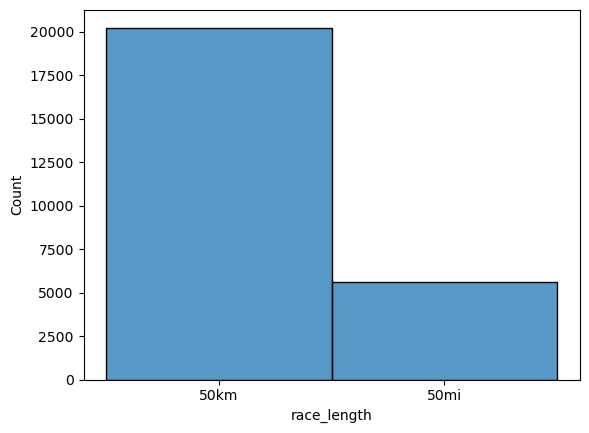

In [86]:
sns.histplot(df2['race_length'])

## Distribution of Race Lengths by Gender


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='race_length', ylabel='Count'>

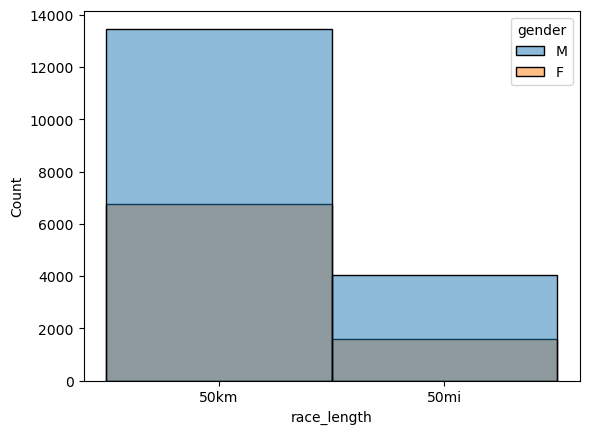

In [97]:
# sns.histplot(df2, x = 'race_length', hue='gender')
sns.histplot(df2, x = 'race_length', hue='gender')

## Distribution of Average Speed for 50mi Races


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


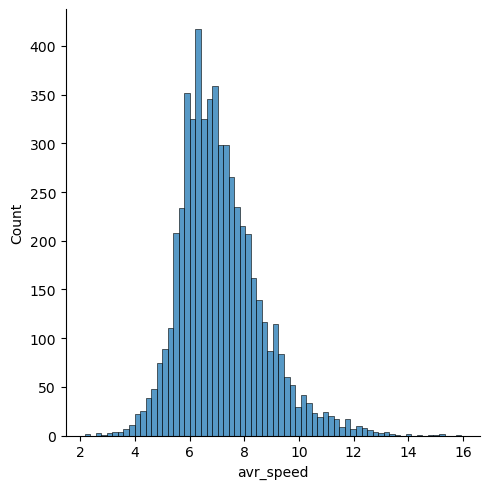

In [88]:
sns.displot(df2[df2['race_length'] == '50mi']['avr_speed'])

## Average Speed by Race Length and Gender


<Axes: xlabel='gender', ylabel='avr_speed'>

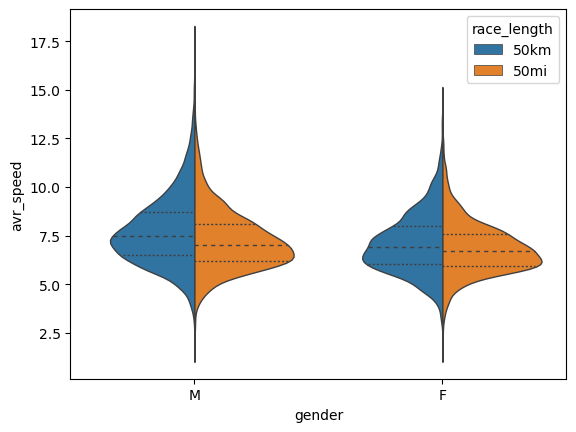

In [100]:
# sns.violinplot(df2, x='race_length', y='avr_speed', hue='gender', split= True, inner='quart', linewidth=1)

sns.violinplot(df2, hue='race_length', y='avr_speed', x='gender', split= True, inner='quart', linewidth=1)

## Scatter Plot of Age vs Average Speed


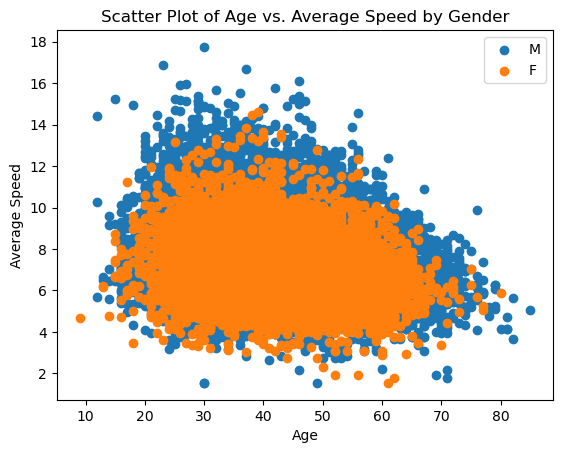

In [102]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots() 

# Separate data points by gender
for gender in df2['gender'].unique():
    gender_data = df2[df2['gender'] == gender]
    ax.scatter(gender_data['age'], gender_data['avr_speed'], label=gender)

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Average Speed')
ax.set_title('Scatter Plot of Age vs. Average Speed by Gender')
ax.legend()

# Show the plot
plt.show()

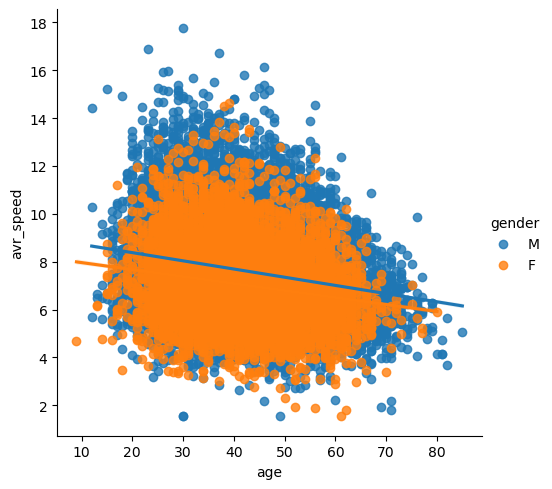

In [101]:
sns.lmplot(df2, x= 'age', y='avr_speed', hue= "gender")


# Analytical Questions

## Difference in Speed between Genders for 50k and 50mi Races

In [119]:
df2.groupby(['race_length','gender'])['avr_speed'].mean()

race_length  gender
50km         F         7.083011
             M         7.738985
50mi         F         6.834371
             M         7.257633
Name: avr_speed, dtype: float64

In [118]:
df2.groupby(['race_length','gender'])['year'].count()

race_length  gender
50km         F          6761
             M         13469
50mi         F          1576
             M          4051
Name: year, dtype: int64

## Best Performing Age Group in 50mi and 50km Races


In [120]:
df2.head(5)

,year,race_day,race_name,race_length,number of finishers,winner performance,gender,age,avr_speed,winner id
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,29,15.158,71287
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,39,12.369,629508
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,21,12.099,64838
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,37,11.449,704450
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,43,11.212,810281


In [155]:
#groupby to a data series
df2.groupby(['race_length','gender', 'age'])['avr_speed'].mean()

#change dataseries to dataframe
df3 = df2.groupby(['race_length','gender', 'age'])['avr_speed'].mean().reset_index(name='Average Speed')
df3.sort_values('Average Speed',ascending=False)


,race_length,gender,age,Average Speed
193,50mi,M,12,10.280000
65,50km,M,12,10.067000
68,50km,M,15,9.403750
73,50km,M,20,8.825188
75,50km,M,22,8.588076
...,...,...,...,...
0,50km,F,9,4.681000
135,50km,M,82,4.670000
134,50km,M,81,4.342667
133,50km,M,80,4.146000


In [ ]:
# Find the best performing age group in 50mi races
df2[df2['race_length']=="50mi"].groupby('age')['avr_speed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>20')

# Find the best performing age group in 50km races
df2[df2['race_length']=="50km"].groupby('age')['avr_speed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>20').
# df2[df2['race_length']=="50km"].groupby(['age','gender'])['avr_speed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>20')

,mean,count
age,,
12,10.067000,2
20,8.712523,86
15,8.281222,9
22,8.260221,113
21,8.129901,91
...,...,...
78,5.040333,3
80,5.014000,2
9,4.681000,1


In [ ]:
#instead of query('count>20')
df_filtered = df2[df2['race_length']=="50km"].groupby('age')['avr_speed'].agg(['mean','count']).sort_values('mean',ascending=False)
df_filtered[df_filtered['count'] > 20] 


,mean,count
age,,
20,8.712523,86
22,8.260221,113
21,8.129901,91
26,8.121561,310
23,8.061653,176
27,8.051917,324
32,7.998165,541
29,7.984435,439
24,7.982698,202


 # Analysis by Season

In [167]:
# df2.head(20)
df2.dtypes

year                            int64
race_day               datetime64[ns]
race_name                      object
race_length                    object
number of finishers             int64
winner performance             object
gender                         object
age                             int32
avr_speed                     float64
winner id                       int64
dtype: object

In [ ]:
#change the format to date type

# df3['race_day'] = pd.to_datetime(df2['race_day'], format='%d.%m.%Y')
# df2['race_day'] = df2['race_day'].astype('datetime64[ns]') 
df2['race_day'] = pd.to_datetime(df2['race_day'], format='%d.%m.%Y', errors='coerce')

In [169]:
#create a seasson column:

def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:  # 12, 1, 2
        return 'Winter'


df2['season'] = df2['race_day'].dt.month.apply(get_season)
df2

,year,race_day,race_name,race_length,number of finishers,winner performance,gender,age,avr_speed,winner id,season
0,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,29,15.158,71287,Winter
1,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,39,12.369,629508,Winter
2,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,21,12.099,64838,Winter
3,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,37,11.449,704450,Winter
4,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,43,11.212,810281,Winter
...,...,...,...,...,...,...,...,...,...,...,...
25852,2020,2020-10-03,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,62,7.013,816361,Autumn
25853,2020,2020-10-03,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,43,6.706,326469,Autumn
25854,2020,2020-10-03,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,58,6.705,372174,Autumn
25855,2020,2020-10-03,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,39,6.543,860349,Autumn


In [ ]:
# Extract the month from the race day and create a 'race_month' column
df2['race_month'] = df2['race_day'].str.split('.').str.get(1).astype(int)

# Create a 'race_season' column based on the race month
df2['race_season'] = df2['race_month'].apply(lambda x: 'winter' if x > 11 else 'fall' if x > 8 else 'summer' if x > 5 else 'spring' if x > 2 else 'winter')

# Display the updated data
df2.head(10)

# Analyze average speed by race season
df2.groupby('race_season')['avr_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

In [171]:
# Analyze average speed by race season
df2.groupby('season')['avr_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
season,,
Spring,7.684430,3294
Winter,7.518187,11595
Autumn,7.406619,8315
Summer,6.869336,2653


# Analysis for Egyptian Athletes

In [174]:
df2

,year,race_day,race_name,race_length,number of finishers,winner performance,gender,age,avr_speed,winner id,season
0,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,29,15.158,71287,Winter
1,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,39,12.369,629508,Winter
2,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,21,12.099,64838,Winter
3,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,37,11.449,704450,Winter
4,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,43,11.212,810281,Winter
...,...,...,...,...,...,...,...,...,...,...,...
25852,2020,2020-10-03,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,62,7.013,816361,Autumn
25853,2020,2020-10-03,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,43,6.706,326469,Autumn
25854,2020,2020-10-03,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,58,6.705,372174,Autumn
25855,2020,2020-10-03,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,39,6.543,860349,Autumn


In [172]:
# Filter data for races in Egypt
df3 = df[(df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'EGY')]

# Display the first 5 rows of Egyptian races data
df3.head(5)

# Check the shape of the dataset for Egyptian races
df3.shape

KeyError: 'Event name'

In [ ]:
# Filter data for Egyptian athletes
egyptians = df[df['Athlete country'] == 'EGY']

# Count the number of Egyptian athletes
egyptians.shape[0]